In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statistics as st

# Pre-processing Data

In [2]:
# Load and read Data

df = pd.read_csv('userprofile.csv')
df.head()

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [ ]:
# Melihat data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userID            138 non-null    object 
 1   latitude          138 non-null    float64
 2   longitude         138 non-null    float64
 3   smoker            138 non-null    object 
 4   drink_level       138 non-null    object 
 5   dress_preference  138 non-null    object 
 6   ambience          138 non-null    object 
 7   transport         138 non-null    object 
 8   marital_status    138 non-null    object 
 9   hijos             138 non-null    object 
 10  birth_year        138 non-null    int64  
 11  interest          138 non-null    object 
 12  personality       138 non-null    object 
 13  religion          138 non-null    object 
 14  activity          138 non-null    object 
 15  color             138 non-null    object 
 16  weight            138 non-null    int64  
 1

In [3]:
# Convert DataTypes of variables

# birth_year masih dalam type int, perlu diconvert menjadi datetime
df['birth_year'] = pd.to_datetime(df['birth_year'],format="%Y")

In [ ]:
# Melihat data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   userID            138 non-null    object        
 1   latitude          138 non-null    float64       
 2   longitude         138 non-null    float64       
 3   smoker            138 non-null    object        
 4   drink_level       138 non-null    object        
 5   dress_preference  138 non-null    object        
 6   ambience          138 non-null    object        
 7   transport         138 non-null    object        
 8   marital_status    138 non-null    object        
 9   hijos             138 non-null    object        
 10  birth_year        138 non-null    datetime64[ns]
 11  interest          138 non-null    object        
 12  personality       138 non-null    object        
 13  religion          138 non-null    object        
 14  activity          138 non-

In [4]:
# remove duplicates

df = df.drop_duplicates(subset=['userID'])

In [5]:
# Get description of data

df.describe()

,latitude,longitude,weight,height
count,138.000000,138.000000,138.000000,138.000000
mean,21.810389,-100.291857,64.869565,1.667536
std,1.552529,0.869916,17.214332,0.130473
min,18.813348,-101.054680,40.000000,1.200000
25%,22.126030,-100.983000,53.000000,1.600000
50%,22.150497,-100.937788,65.000000,1.690000
75%,22.186642,-99.183251,74.750000,1.750000
max,23.771030,-99.067106,120.000000,2.000000


## Handle missing value

In [6]:
# Cek kategori

print(df['activity'].unique())
print(df['budget'].unique())
print(df['transport'].unique())

['student' 'professional' '?' 'unemployed' 'working-class']
['medium' 'low' '?' 'high']
['on foot' 'public' 'car owner' '?']


In [7]:
# Mendapatkan modus dari tiap kolom (activity, budget, transport)

modus_act = st.mode(df['activity'])
modus_budget = st.mode(df['budget'])
modus_trans = st.mode(df['transport'])

print(modus_act)
print(modus_budget)
print(modus_trans)

student
medium
public


In [8]:
# Replace value '?' menjadi modus dari tiap kolom

df['activity'] = df['activity'].replace('?', modus_act)
df['budget'] = df['budget'].replace('?', modus_budget)
df['transport'] = df['transport'].replace('?', modus_trans)

In [9]:
# Cek kategori

print(df['activity'].unique())
print(df['budget'].unique())
print(df['transport'].unique())

['student' 'professional' 'unemployed' 'working-class']
['medium' 'low' 'high']
['on foot' 'public' 'car owner']


In [ ]:
# Cek dataframe

df.head(138)

,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989-01-01,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990-01-01,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989-01-01,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940-01-01,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992-01-01,none,thrifty-protector,Catholic,student,black,65,medium,1.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,U1134,22.149654,-100.998610,false,casual drinker,no preference,family,public,single,independent,1991-01-01,variety,hard-worker,Catholic,student,black,52,medium,1.65
134,U1135,22.170396,-100.949936,false,casual drinker,informal,family,on foot,single,kids,1988-01-01,variety,hunter-ostentatious,Catholic,student,purple,66,low,1.54
135,U1136,22.149607,-100.997235,true,social drinker,no preference,friends,car owner,single,independent,1990-01-01,retro,thrifty-protector,Catholic,student,black,50,low,1.60
136,U1137,22.144803,-100.944623,false,social drinker,formal,family,public,single,independent,1989-01-01,eco-friendly,hard-worker,Catholic,student,blue,72,low,1.78


# Chart activity - budget - drink_level


## Activity


In [11]:
# Membuat dataframe baru untuk 'activity' dan 'userID'

df1 = df.groupby('activity')[('userID')].count().reset_index().sort_values(by='activity', ascending=True)

df1.head()

,activity,userID
0,professional,15
1,student,120
2,unemployed,2
3,working-class,1


Text(0, 0.5, 'Number of Customer')

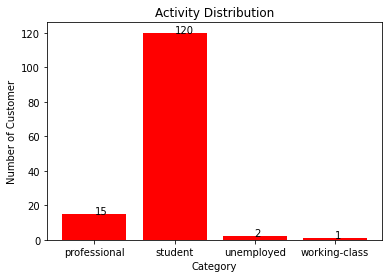

In [34]:
# Membuat bar chart

x = df1['activity']
y = df1['userID']

plot1 = plt.bar(x,y, color='red')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

plt.title('Activity Distribution')
plt.xlabel('Category')        
plt.ylabel('Number of Customer')

**Student** menjadi pekerjaan yang dominan dilakukan oleh para customer dengan total  120 customer.

## Budget

In [13]:
# Membuat dataframe baru untuk 'budget' dan 'userID'

df2 = df.groupby('budget')[('userID')].count().reset_index().sort_values(by='budget', ascending=True)
df2.head()

,budget,userID
0,high,5
1,low,35
2,medium,98


Text(0, 0.5, 'Number of Customer')

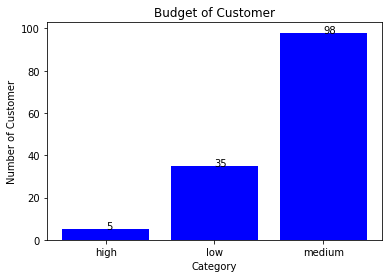

In [35]:
# Membuat bar chart

x1 = df2['budget']
y1 = df2['userID']
plot2 = plt.bar(x1, y1, color='blue')

def addlabels(x1,y1):
    for i in range(len(x1)):
        plt.text(i,y1[i],y1[i])

addlabels(x1,y1)

plt.title('Budget of Customer')
plt.xlabel('Category')
plt.ylabel('Number of Customer')

Customer dengan budget **medium** merupakan customer yang paling banyak mengunjungi restoran dengan total 96 customer.

## Drink Level

In [15]:
# Membuat dataframe baru untuk 'drink_level' dan 'userID'

df3 = df.groupby('drink_level')[('userID')].count().reset_index().sort_values(by='drink_level', ascending=True)
df3.head()

,drink_level,userID
0,abstemious,51
1,casual drinker,47
2,social drinker,40


Text(0, 0.5, 'Number of Customer')

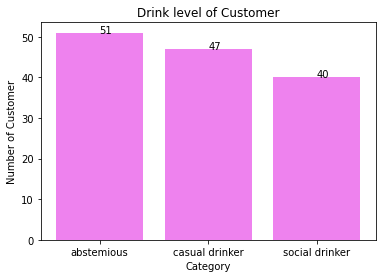

In [36]:
# Membuat bar chart

x2 = df3['drink_level']
y2 = df3['userID']
plot3 = plt.bar(x2, y2, color='violet')

def addlabels(x2,y2):
    for i in range(len(x2)):
        plt.text(i,y2[i],y2[i])

addlabels(x2,y2)

plt.title('Drink level of Customer')
plt.xlabel('Category')
plt.ylabel('Number of Customer')

Drink level dari para customer cenderung kepada kategori **Abstemious** atau moderat drinker

# Insight

Mayoritas pengunjung adalah **Student** dengan budget **Medium** serta drink level **Abstemious**.

Potensi peningkatan profit restoran melalui **kegiatan promosi minuman alkohol** yang menargetkan **Student** yang memiliki budget **Medium** untuk lebih mendorong lagi penjualan minuman alkohol dan intensitas pengunjung restoran.